# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t,ttest_ind
from numpy.random import seed
 
medical = pd.read_csv('../data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [41]:
medical.head(10)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
5,31,0,25.740,0,0,2,3756.62160,0
6,46,0,33.440,1,0,2,8240.58960,1
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
9,60,0,25.840,0,0,1,28923.13692,0


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

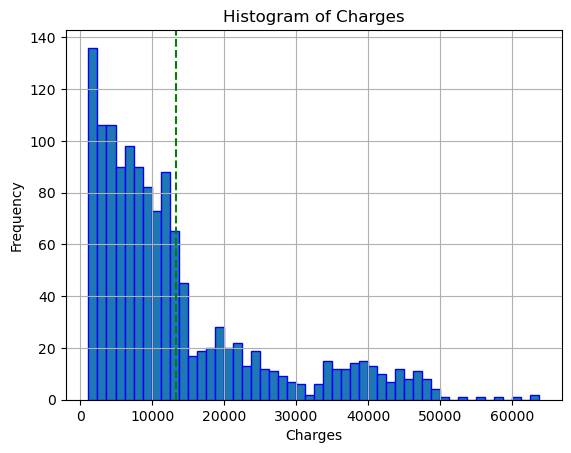

In [42]:
_ = medical['charges'].hist(bins=50, edgecolor='b')
_ = plt.axvline(medical['charges'].mean(), color='g', linestyle='--', label='Mean')
#plt.axvline(mean - std_dev, color='y', linestyle='dotted' , label = ' σ')
#plt.axvline(mean + std_dev, color='y', linestyle='dotted' )
_ = plt.xlabel('Charges')
_ = plt.ylabel('Frequency')
_ = plt.title('Histogram of Charges')
_ = plt.show()

In [35]:
mean_charges = medical['charges'].mean()
std_charges = medical['charges'].std()

print(f"Mean  of charged = {mean_charges:,.2f}\nStandard deviation  = {std_charges:,.2f}")

Mean  of charged = 13,270.42
Standard deviation  = 12,110.01


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ To apply CLT i need to be sure that random sample of charges >30 , then calculate the confidence interval of the mean and check if this interval include 12,000. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ WE are going to use one-sided interval

In [63]:
def charges_sampler(data,n):
    return np.random.choice(data, n)


In [64]:
seed(47)
n = 50
sample = charges_sampler(medical['charges'],n)
# Sample statictics
sample_mean = sample.mean() # ~ est mean
sample_std = sample.std()
est_std_dev = np.std(sample, ddof=1)
standard_error = est_std_dev / (np.sqrt(n))

# Degrees of freedom
dof = n - 1

# Critical t-value for a 95% confidence level
alpha = 0.05  # Significance level (5% for 95% confidence)
critical_t_value = t.ppf(1 - alpha/2, df=dof)

# Margin of error
margin_of_error = critical_t_value * standard_error

# Confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Critical t value = {critical_t_value:,.2f}\nConfidence interval  = {confidence_interval}")

Critical t value = 2.01
Confidence interval  = (9501.45479408452, 16082.862511515481)


In [ ]:
#The lower bound of the confidence interval ($8,267) is below $12,000. The administrator's concern may be justified

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ In the context of comparing whether people with insurance are charged a different amount from those without insurance, the null and alternative hypotheses can be as follows:

**Null Hypothesis (H0):** The mean charges for people with insurance are equal to the mean charges for people without insurance :
\(H0: μ_0 = μ_1\)

**Alternative Hypothesis (H1):** The mean charges for people with insurance  are not equal to the mean charges for people without insurance :
\(H1: μ_0 ≠ μ_1\)

These hypotheses are testing whether there is a statistically significant difference in the means of the two groups (insured and without insurance).

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [60]:
insured_charges = medical[medical['insuranceclaim']==1]['charges']
print(insured_charges)

0       16884.92400
1        1725.55230
4        3866.85520
6        8240.58960
10       2721.32080
           ...     
1330    12629.16560
1331    10795.93733
1334     2205.98080
1335     1629.83350
1337    29141.36030
Name: charges, Length: 783, dtype: float64


In [71]:
#import numpy as np
#from scipy.stats import t, ttest_ind
seed(47)
n = 50

#insur_charges = medical[medical['insuranceclaim'] == 1]['charges']
#uninsur_charges = medical[medical['insuranceclaim'] == 0]['charges']

sample_insur = charges_sampler(medical[medical['insuranceclaim'] == 1]['charges'],n)
sample_uninsur = charges_sampler(medical[medical['insuranceclaim'] == 0]['charges'],n)

# 
mean_insur = np.mean(sample_insur)
mean_uninsur = np.mean(sample_uninsur)
std_insur = np.std(sample_insur, ddof=1) # est 
std_uninsur = np.std(sample_uninsur, ddof=1) # est 


# Calculate the pooled standard deviation (sp)
sp = np.sqrt((((n - 1) * std_insur ** 2) + ((n - 1) * std_uninsur ** 2)) / (n - 1 + n - 1))

# Calculate the t-statistic
t_statistic = (mean_insur - mean_uninsur) / (sp * np.sqrt((1 / n) + (1 / n)))

# Degrees of freedom
df = n - 1 + n - 1

# Calculate p-value
p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df))

# Using scipy.stats
t_statistic_scipy, p_value_scipy = ttest_ind(sample_insur, sample_uninsur)

# Print results
print(f"Manual t-statistic = {t_statistic:.3f}")
print(f"Manual p-value =  {p_value:.4f}")
print(f"scipy.stats t-statistic = {t_statistic_scipy:.3f}")
print(f"scipy.stats p-value = {p_value_scipy:.4f}")


Manual t-statistic = 2.882
Manual p-value =  0.0049
scipy.stats t-statistic = 2.882
scipy.stats p-value = 0.0049


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ I was not able find an equivalent function for performing a z-test from a sample like for t-tests.
The reason is that z-tests are primarily used when you know the population parameters (mean and standard deviation) 
and want to test a hypothesis based on a sample

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test